## Load Gdrive

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# import sys
# sys.path.append('/content/drive/My Drive/Colab Notebooks/AMS2023')

## import library

In [4]:
import pandas as pd

## A. Tokenizing with Gensim

In [6]:
df = pd.read_csv('clean_dataset_part01.csv',sep=";")

In [7]:
df.head()

,Unnamed: 0,Tweet,Sentimen,step01,tokens,tokens_perbaikan,Stop_removal,step02,ProcessedText
0,0,"emang lemes bgt ya mulut lu, gue yg mau beli-b...",-1.0,emang lemes bgt ya mulut lu gue yg mau beli be...,"['emang', 'lemes', 'bgt', 'ya', 'mulut', 'lu',...","['memang', 'lemes', 'banget', 'iya', 'mulut', ...","['lemes', 'banget', 'iya', 'mulut', 'beli', 'b...",lemes banget iya mulut beli beli obat mikirr d...,lemes banget iya mulut beli beli obat mikirr d...
1,1,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid number mari kita dirum...,"['cegah', 'mata', 'rantai', 'covid', 'number',...","['cegah', 'mata', 'rantai', 'covid', 'number',...","['cegah', 'mata', 'rantai', 'covid', 'number',...",cegah mata rantai covid number mari dirumah mi...,cegah mata rantai covid number mari rumah ming...
2,2,aku mohon yaAllah semoga wabah covid-19 menghi...,1.0,aku mohon yaallah semoga wabah covid number me...,"['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...","['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...","['mohon', 'yaallah', 'semoga', 'wabah', 'covid...",mohon yaallah semoga wabah covid number menghi...,mohon yaallah moga wabah covid number hilang r...
3,3,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"['pemprov', 'papua', 'naikkan', 'status', 'jad...","['pemprov', 'papua', 'naikkan', 'status', 'jad...","['pemprov', 'papua', 'naikkan', 'status', 'tan...",pemprov papua naikkan status tanggap darurat c...,pemprov papua naik status tanggap darurat covi...
4,4,Covid belum nyampe prigen mbak hmm hoax,0.0,covid belum nyampe prigen mbak hmm hoax,"['covid', 'belum', 'nyampe', 'prigen', 'mbak',...","['covid', 'belum', 'nyampe', 'prigen', 'mbak',...","['covid', 'nyampe', 'prigen', 'mbak', 'aduh', ...",covid nyampe prigen mbak aduh bohong,covid nyampe prigen mbak aduh bohong


In [8]:
df['ProcessedText'].loc[0:5]

0    lemes banget iya mulut beli beli obat mikirr d...
1    cegah mata rantai covid number mari rumah ming...
2    mohon yaallah moga wabah covid number hilang r...
3    pemprov papua naik status tanggap darurat covi...
4                 covid nyampe prigen mbak aduh bohong
5    nyuruh orang pintar togog kerumun orang nulari...
Name: ProcessedText, dtype: object

In [9]:
mask = [isinstance(item, (str, bytes)) for item in df['ProcessedText']]

In [10]:
print(df.loc[mask])

     Unnamed: 0                                              Tweet  Sentimen  \
0             0  emang lemes bgt ya mulut lu, gue yg mau beli-b...      -1.0   
1             1  Cegah mata rantai Covid-19,mari kita dirumah s...       1.0   
2             2  aku mohon yaAllah semoga wabah covid-19 menghi...       1.0   
3             3  Pemprov Papua Naikkan Status Jadi Tanggap Daru...       1.0   
4             4            Covid belum nyampe prigen mbak hmm hoax       0.0   
..          ...                                                ...       ...   
898         900  Seluruh negara di dunia mengalami masa sulit k...       1.0   
899         901  Setelah covid dan skripsi disaster selesai, ma...       1.0   
900         902  Malam ini!! Projek "BENDA BOLEH BINCANG" 9 mal...       0.0   
901         903                Pontang - panting di koyak covid 19      -1.0   
902         904  Masalahnya sekarang isu jangkitan covid. Alaaa...      -1.0   

                                       

In [11]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))

In [12]:
word_tokens = df['ProcessedText'].values.tolist()
word_tokens

['lemes banget iya mulut beli beli obat mikirr drmn beli obat kerja devil',
 'cegah mata rantai covid number mari rumah minggu repeated',
 'mohon yaallah moga wabah covid number hilang ramadhan',
 'pemprov papua naik status tanggap darurat covid number allcaps opm allcaps',
 'covid nyampe prigen mbak aduh bohong',
 'nyuruh orang pintar togog kerumun orang nularin covid number lol mikir repeated',
 'pikir2 mnde plk nk setelkn lepas covid',
 'selamat pagi jum at jum at empat pandemi covid number moga kasih sehat moga',
 'hikmah musibah covid number moga jabat perintah sadar depan kaya negara sejahtera rakyat indonesia kaya keluarga penting golong bela penting allcaps wna allcaps jelas2 luka penting rakyat',
 'cegah covid number serta jajar polsek ranji aksi peduli bagi masker gratis guna jalan giat polsek ranji kamis number number febriputraguci',
 'iya allah mohon mu kenan doa doa rana sungguh engkau maha asih maha sayang repeated iya allah lindung sakit jangkit covid number repeated mo

In [13]:
data_tokens = list(sent_to_words(word_tokens))

In [14]:
data_tokens[0:5]

[['lemes',
  'banget',
  'iya',
  'mulut',
  'beli',
  'beli',
  'obat',
  'mikirr',
  'drmn',
  'beli',
  'obat',
  'kerja',
  'devil'],
 ['cegah',
  'mata',
  'rantai',
  'covid',
  'number',
  'mari',
  'rumah',
  'minggu',
  'repeated'],
 ['mohon',
  'yaallah',
  'moga',
  'wabah',
  'covid',
  'number',
  'hilang',
  'ramadhan'],
 ['pemprov',
  'papua',
  'naik',
  'status',
  'tanggap',
  'darurat',
  'covid',
  'number',
  'allcaps',
  'opm',
  'allcaps'],
 ['covid', 'nyampe', 'prigen', 'mbak', 'aduh', 'bohong']]

## B. Phrase Modeling: Bigram and Trigram Models

In [16]:
bigram = gensim.models.Phrases(data_tokens, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_tokens], threshold=100)

In [17]:
for index in range(len(data_tokens)):
  for token in bigram[data_tokens[index]]:
    if '_' in token:
      data_tokens[index].append(token)
  for token in trigram[data_tokens[index]]:
    if '_' in token:
      data_tokens[index].append(token)

In [18]:
data_tokens[0:3]

[['lemes',
  'banget',
  'iya',
  'mulut',
  'beli',
  'beli',
  'obat',
  'mikirr',
  'drmn',
  'beli',
  'obat',
  'kerja',
  'devil'],
 ['cegah',
  'mata',
  'rantai',
  'covid',
  'number',
  'mari',
  'rumah',
  'minggu',
  'repeated',
  'mata_rantai',
  'mata_rantai',
  'mata_rantai'],
 ['mohon',
  'yaallah',
  'moga',
  'wabah',
  'covid',
  'number',
  'hilang',
  'ramadhan']]

## C. Create Dictionary and Corpus

In [20]:
from gensim import corpora, models

# create dictionary
dictionary = corpora.Dictionary(data_tokens)

# create corpus
corpus = [dictionary.doc2bow(token) for token in data_tokens]

In [21]:
print(corpus[0:3])

[[(0, 1), (1, 3), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2)], [(10, 1), (11, 1), (12, 1), (13, 1), (14, 3), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)], [(11, 1), (16, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)]]


## D. Coherence Score

In [23]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from numpy import array

def get_coherence_values(dictionary, corpus, tokens, num_topics):
  model_list = []
  coherence_values = []
  for i in range(1, num_topics+1):
    model = LdaModel(corpus=corpus, id2word=dictionary, 
                     num_topics=i, iterations=100)
    coherence_model = CoherenceModel(model=model, texts=tokens, 
                                     dictionary=dictionary, coherence='c_v')
    model_list.append(model)
    coherence_values.append(coherence_model.get_coherence())
  
  return model_list, coherence_values

### show graph

In [25]:
num_topics = 10
model_list, coherence_values = get_coherence_values(dictionary, corpus, 
                                                    data_tokens, num_topics)

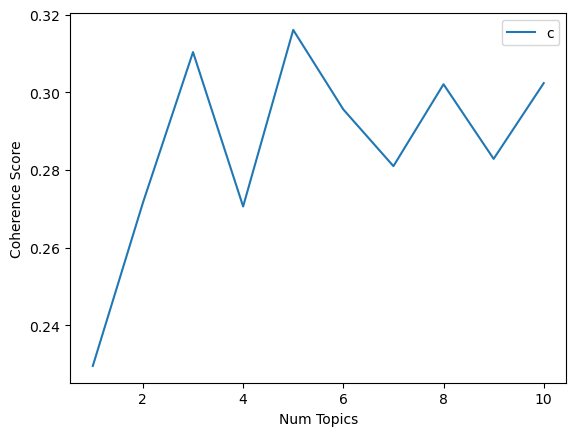

In [26]:
import matplotlib.pyplot as plt

plt.plot(range(1, num_topics+1), coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence Score')
plt.legend(('coherence_values'), loc='best')
plt.show()

In [27]:
plt.savefig('tes-plot.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [28]:
coherence_df = pd.DataFrame(list(zip([i+1 for i in range(num_topics)], coherence_values)), 
                            columns=['num_of_topics', 'coherence_values'])
coherence_df

,num_of_topics,coherence_values
0,1,0.229524
1,2,0.271545
2,3,0.310330
3,4,0.270577
4,5,0.316037
5,6,0.295561
6,7,0.280966
7,8,0.302048
8,9,0.282838
9,10,0.302340


In [29]:
coherence_df.to_csv('coherence-value-final.csv', index=False)

## E. Base Model

In [31]:
# build LDA Model
model = LdaModel(corpus=corpus, num_topics=8, id2word=dictionary)

In [32]:
for index, topic in model.print_topics(-1):
  print('Topic {}:\nWord: {}\n'.format(index+1, topic))

Topic 1:
Word: 0.078*"allcaps" + 0.045*"number" + 0.034*"covid" + 0.024*"repeated" + 0.010*"iya" + 0.007*"gugus_tugas" + 0.006*"elongated" + 0.006*"mata_rantai" + 0.005*"rumah" + 0.005*"susah"

Topic 2:
Word: 0.061*"covid" + 0.058*"number" + 0.054*"allcaps" + 0.013*"virus" + 0.012*"repeated" + 0.011*"sebar" + 0.009*"corona" + 0.007*"tangan" + 0.007*"moga" + 0.006*"sehat"

Topic 3:
Word: 0.047*"number" + 0.043*"covid" + 0.020*"allcaps" + 0.011*"repeated" + 0.006*"sih" + 0.005*"kena" + 0.005*"sang" + 0.004*"kerja" + 0.004*"moga" + 0.004*"virus"

Topic 4:
Word: 0.071*"number" + 0.050*"covid" + 0.031*"repeated" + 0.018*"allcaps" + 0.009*"papua_barat" + 0.008*"virus" + 0.006*"corona" + 0.006*"makam_jenazah" + 0.006*"wabah" + 0.005*"bantu"

Topic 5:
Word: 0.045*"covid" + 0.037*"allcaps" + 0.024*"number" + 0.021*"repeated" + 0.009*"rumah" + 0.007*"orang" + 0.005*"iya" + 0.005*"moga" + 0.005*"jaga" + 0.004*"cegah"

Topic 6:
Word: 0.077*"allcaps" + 0.075*"number" + 0.067*"covid" + 0.008*"repeat

In [33]:
import pathlib
pathlib.Path().resolve()

WindowsPath('C:/Users/pramu/STKI/Pertemuan13/topicModelling2')

In [39]:
from gensim.test.utils import datapath

temp_file = datapath("D:/Download/Minggu13/topicModelling2/ldamodel")
model.save(temp_file)

In [43]:
temp_file = datapath("D:/Download/Minggu13/topicModelling2/ldamodel")
mymodel = LdaModel.load(temp_file)
mymodel.show_topics(num_topics=8)

[(0,
  '0.078*"allcaps" + 0.045*"number" + 0.034*"covid" + 0.024*"repeated" + 0.010*"iya" + 0.007*"gugus_tugas" + 0.006*"elongated" + 0.006*"mata_rantai" + 0.005*"rumah" + 0.005*"susah"'),
 (1,
  '0.061*"covid" + 0.058*"number" + 0.054*"allcaps" + 0.013*"virus" + 0.012*"repeated" + 0.011*"sebar" + 0.009*"corona" + 0.007*"tangan" + 0.007*"moga" + 0.006*"sehat"'),
 (2,
  '0.047*"number" + 0.043*"covid" + 0.020*"allcaps" + 0.011*"repeated" + 0.006*"sih" + 0.005*"kena" + 0.005*"sang" + 0.004*"kerja" + 0.004*"moga" + 0.004*"virus"'),
 (3,
  '0.071*"number" + 0.050*"covid" + 0.031*"repeated" + 0.018*"allcaps" + 0.009*"papua_barat" + 0.008*"virus" + 0.006*"corona" + 0.006*"makam_jenazah" + 0.006*"wabah" + 0.005*"bantu"'),
 (4,
  '0.045*"covid" + 0.037*"allcaps" + 0.024*"number" + 0.021*"repeated" + 0.009*"rumah" + 0.007*"orang" + 0.005*"iya" + 0.005*"moga" + 0.005*"jaga" + 0.004*"cegah"'),
 (5,
  '0.077*"allcaps" + 0.075*"number" + 0.067*"covid" + 0.008*"repeated" + 0.007*"indonesia" + 0.007*

## Extract dominant topic per tweet

In [66]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data_tokens):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                # Ganti append dengan pd.concat
                topic_data = pd.DataFrame([[int(topic_num), round(prop_topic, 4), topic_keywords]], 
                                          columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])
                sent_topics_df = pd.concat([sent_topics_df, topic_data], ignore_index=True)
            else:
                break

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords', 'Text']

    return sent_topics_df


In [68]:
import pandas as pd
df_topic_sents_keywords = format_topics_sentences(ldamodel=model, 
                                                  corpus=corpus, 
                                                  texts=data_tokens)

df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 
                             'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic = pd.concat([df_dominant_topic], ignore_index=True)

In [70]:
df_dominant_topic[:100:]

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0,0.9374,"allcaps, number, covid, repeated, iya, gugus_t...","[lemes, banget, iya, mulut, beli, beli, obat, ..."
1,1,0,0.7654,"allcaps, number, covid, repeated, iya, gugus_t...","[cegah, mata, rantai, covid, number, mari, rum..."
2,2,5,0.9026,"allcaps, number, covid, repeated, indonesia, o...","[mohon, yaallah, moga, wabah, covid, number, h..."
3,3,7,0.5443,"allcaps, covid, number, iya, moga, repeated, o...","[pemprov, papua, naik, status, tanggap, darura..."
4,4,3,0.8749,"number, covid, repeated, allcaps, papua_barat,...","[covid, nyampe, prigen, mbak, aduh, bohong]"
...,...,...,...,...,...
95,95,3,0.9675,"number, covid, repeated, allcaps, papua_barat,...","[am, mrs, lestari, abyasa, balikpapan, terima,..."
96,96,6,0.9270,"number, allcaps, covid, orang, repeated, makam...","[tunggu, wabah, allcaps, covid, allcaps, numbe..."
97,97,3,0.8905,"number, covid, repeated, allcaps, papua_barat,...","[koruptor, jahat, bebas, alas, pandemi, covid,..."
98,98,2,0.9698,"number, covid, allcaps, repeated, sih, kena, s...","[number, angkuh, sombong, serba, bukankh, viru..."


In [72]:
# save the df_dominant_topic
df_dominant_topic.to_csv('dominant_topic_resuls.csv', index=False)

In [74]:
dom = pd.read_csv('dominant_topic_resuls.csv')

In [76]:
dom

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0,0.9374,"allcaps, number, covid, repeated, iya, gugus_t...","['lemes', 'banget', 'iya', 'mulut', 'beli', 'b..."
1,1,0,0.7654,"allcaps, number, covid, repeated, iya, gugus_t...","['cegah', 'mata', 'rantai', 'covid', 'number',..."
2,2,5,0.9026,"allcaps, number, covid, repeated, indonesia, o...","['mohon', 'yaallah', 'moga', 'wabah', 'covid',..."
3,3,7,0.5443,"allcaps, covid, number, iya, moga, repeated, o...","['pemprov', 'papua', 'naik', 'status', 'tangga..."
4,4,3,0.8749,"number, covid, repeated, allcaps, papua_barat,...","['covid', 'nyampe', 'prigen', 'mbak', 'aduh', ..."
...,...,...,...,...,...
898,898,1,0.9675,"covid, number, allcaps, virus, repeated, sebar...","['negara', 'dunia', 'alami', 'sulit', 'covid',..."
899,899,4,0.9027,"covid, allcaps, number, repeated, rumah, orang...","['covid', 'skripsi', 'disaster', 'selesai', 'b..."
900,900,7,0.9769,"allcaps, covid, number, iya, moga, repeated, o...","['malam', 'repeated', 'proyek', 'allcaps', 'be..."
901,901,1,0.8540,"covid, number, allcaps, virus, repeated, sebar...","['pontang', 'panting', 'koyak', 'covid', 'numb..."
